In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

import qplot.activate

from qplot import get_axes, set_mpl_layout, set_plotly_layout, set_pd_backend

2020-07-31 08:16:38.201 | INFO     | qplot.activate:<module>:26 - IPython detected, applying inline plotting and svg figure format.


In [4]:
# generate data

dates = pd.date_range('2010-01-01', '2020-01-01')
df = pd.DataFrame(np.random.randn(len(dates), 5), index=dates, columns=list('ABCDE')).cumsum()
df.head()

A         B         C         D         E
2010-01-01  0.121563  0.672453  0.321454 -0.679192  0.111542
2010-01-02  1.232560  0.456268 -1.511775  0.148773 -0.615827
2010-01-03  2.288173  0.559926 -2.345664  1.566988  0.218227
2010-01-04  1.371283  1.695923 -0.581207  2.754848 -3.091487
2010-01-05 -0.284057  2.679610  0.110264  2.237199 -1.071573

## Matplotlib static plots

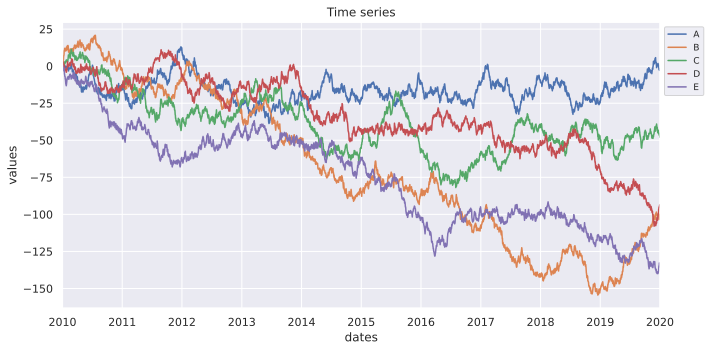

In [6]:
ax = get_axes()
df.plot(ax=ax)
set_mpl_layout(ax, title='Time series', xlabel='dates', ylabel='values')

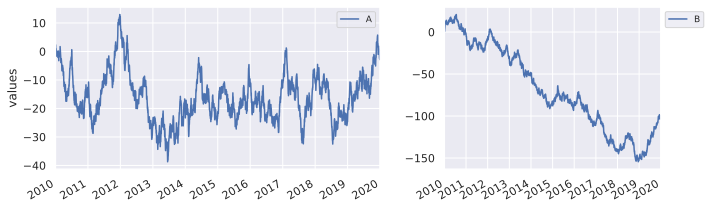

In [11]:
fig, (ax1, ax2) = get_axes(height=6, ncols=2, wratios=[3, 2], return_fig=True)
df['A'].plot(ax=ax1)
df['B'].plot(ax=ax2)
set_mpl_layout(ax1, legend_outside=False, ylabel='values')
set_mpl_layout(ax2)
fig.autofmt_xdate()  # to avoid xticklabels overlap 

## Plotly interactive plots

In [13]:
fig = px.line(df, x=df.index, y='A')
set_plotly_layout(fig, title='A plot', xlabel='dates', ylabel='values', small=True)
fig.show()

In [19]:
# create long df (unstack columns)
df.index.name = 'date'
df.columns.name = 'column'
df_long = df.unstack().to_frame(name='value').reset_index()
df_long

column       date       value
0          A 2010-01-01    0.121563
1          A 2010-01-02    1.232560
2          A 2010-01-03    2.288173
3          A 2010-01-04    1.371283
4          A 2010-01-05   -0.284057
...      ...        ...         ...
18260      E 2019-12-28 -132.781910
18261      E 2019-12-29 -132.808952
18262      E 2019-12-30 -133.019605
18263      E 2019-12-31 -133.827087
18264      E 2020-01-01 -135.437963

[18265 rows x 3 columns]

In [23]:
fig = px.line(df_long, x='date', y='value', color='column')
set_plotly_layout(fig, title='scatter plot', height=10)
fig.show()

In [38]:
df.loc[:, 'S'] = df['C'].abs()
df.loc[:, 'WD'] = list(df.index.weekday)
fig = px.scatter(df.iloc[:50], x='A', y='B', size='S', animation_frame='WD', category_orders={'WD': range(7)})
set_plotly_layout(fig, xlabel='A values', ylabel='B values', height=10)
fig.show(rederer='notebook')